# TEXT CLASSIFICATION

# Importing Libraries

In [1]:
# Importing necessary modules and libraries
import pandas as pd
import html
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import itertools

# Data Loading and Exploration

In [2]:
# Read data into DataFrame
df = pd.read_csv( '/Users/dileepkumarkatla/Downloads/eclipse_jdt.csv')   # eclipse_jdk.csv
df = df.drop(columns=['Duplicated_issue'])

In [3]:
# Initial exploration of the dataset
df.head()

,Issue_id,Priority,Component,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1518,P1,Debug,Icons needed for actions (1GI5UXW),JGS (8/8/01 5:20:19 PM); \tWe need enabled; di...,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2001-10-18 11:51:14 -0400
1,1519,P3,Debug,README: Hit count not reset (1GET20Y),JGS (6/4/01 11:43:47 AM); \tSet a breakpoint i...,RESOLVED,WORKSFORME,2.0,2001-10-10 22:14:00 -0400,2001-11-28 13:42:46 -0500
2,1520,P3,Debug,Use styled text in console (1G9S1YF),DW (2/26/01 5:56:36 PM); \tCould allow users t...,CLOSED,WONTFIX,2.0,2001-10-10 22:14:00 -0400,2002-06-26 11:32:05 -0400
3,1521,P3,Debug,StringBuffer representation (1GE3BFA),JGS (5/21/01 2:09:10 PM); \tTo be consistent; ...,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2002-02-05 10:37:09 -0500
4,1522,P2,Debug,Feature: use #toString to display variable val...,DW (9/27/00 11:12:31 AM); \tCurrently; the typ...,RESOLVED,DUPLICATE,2.0,2001-10-10 22:14:00 -0400,2001-10-17 10:17:47 -0400


<Axes: xlabel='Priority'>

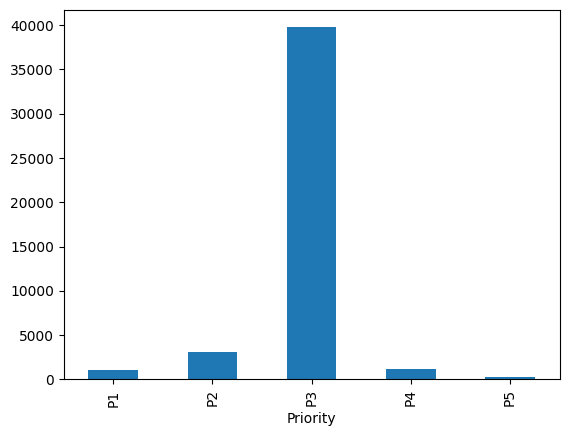

In [4]:
# Visualizing class distribution for 'Priority'
df['Priority'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Component'>

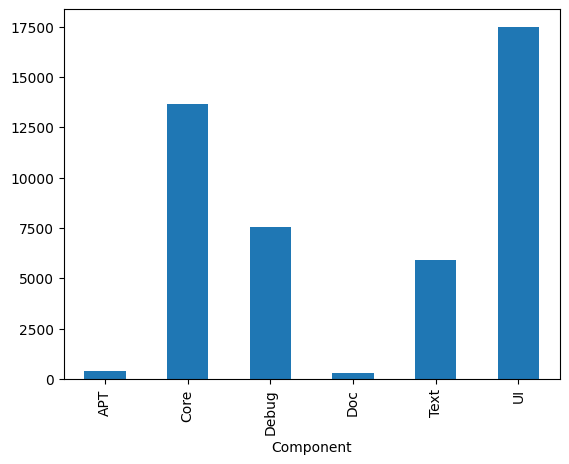

In [5]:
# Visualizing class distribution for 'Component'
df['Component'].value_counts().sort_index().plot(kind='bar')

# Text Preprocessing

In [6]:
# Function to clean text data
def clean(text):
    # Convert html escapes like & to characters
    text = html.unescape(text) 
    # Remove html tags
    text = re.sub(r'<[^<>]*>', ' ', text)
    # Remove markdown URLs
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # Remove text or code in brackets
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # Remove standalone sequences of special characters
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # Remove standalone sequences of hyphens
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [7]:
# Preprocessing and feature engineering
df = df[['Title','Description','Priority']]
df = df.dropna()
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description']) 
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
df.sample(2)

,Priority,text
8037,P4,Need a way to specify number of elements displ...
23526,P3,3.1M4 organize imports class selection popup w...


# Data Splitting

In [8]:
# Splitting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])
# Display size of training and test data
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


# Feature Extraction

In [9]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

# Model Training

In [10]:
# Training the LinearSVC model
model1 = LinearSVC(random_state=0, tol=1e-5, dual=True)
model1.fit(X_train_tf, Y_train)

LinearSVC(dual=True, random_state=0, tol=1e-05)

# Model Evaluation

In [11]:
# Evaluating the model
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.8761513705471091


In [12]:
# Creating a baseline model using DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.8769281988680502


In [13]:
# Generating confusion matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

array([[  19,    1,  199,    4,    0],
       [   6,   18,  576,    8,    0],
       [   8,   48, 7827,   19,    0],
       [   0,    5,  192,   31,    0],
       [   0,    0,   50,    0,    0]])

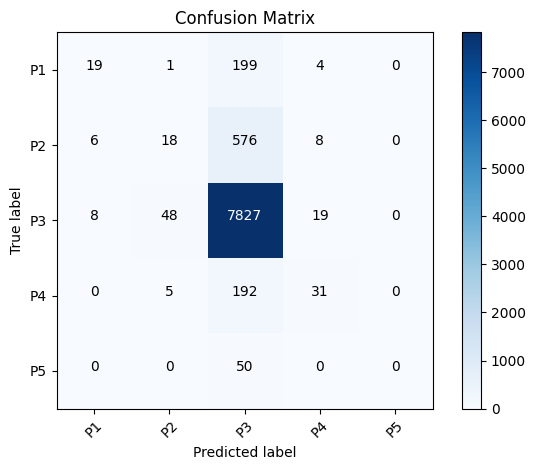

In [14]:
# Assuming you have predictions from your model
predictions = model1.predict(X_test_tf)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Define classes based on unique labels in Y_test
classes = np.unique(Y_test)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [15]:
# Assuming Y_pred is the predicted labels from your model
print(classification_report(Y_test, Y_pred, zero_division=1))

              precision    recall  f1-score   support

          P1       0.58      0.09      0.15       223
          P2       0.25      0.03      0.05       608
          P3       0.89      0.99      0.93      7902
          P4       0.50      0.14      0.21       228
          P5       1.00      0.00      0.00        50

    accuracy                           0.88      9011
   macro avg       0.64      0.25      0.27      9011
weighted avg       0.83      0.88      0.83      9011



In [16]:
# Filter bug reports with priority P3 and sample 4000 rows from it
df_sampleP3 = df[df['Priority'] == 'P3'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Priority'] != 'P3']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Priority'].value_counts()

Priority
P3    4000
P2    3038
P4    1138
P1    1117
P5     252
Name: count, dtype: int64

# Balancing Dataset

In [17]:
# Loading the balanced dataframe
df = df_balanced[['text', 'Priority']]
df = df.dropna()

# Data Preparation
df['text'] = df['text'].apply(clean)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,)
# Display size of training and test data for balanced dataset                                                   
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  7636
Size of Test Data  1909


In [18]:
# Training the Machine Learning model
tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5, dual=True)  # Set dual=True explicitly
model1.fit(X_train_tf, Y_train)
# Model Evaluation
X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)

print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score: 0.48402304871660556
              precision    recall  f1-score   support

          P1       0.45      0.29      0.36       238
          P2       0.42      0.44      0.43       610
          P3       0.53      0.64      0.58       776
          P4       0.49      0.37      0.42       234
          P5       0.00      0.00      0.00        51

    accuracy                           0.48      1909
   macro avg       0.38      0.35      0.36      1909
weighted avg       0.47      0.48      0.47      1909



In [19]:
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
df = pd.read_csv('/Users/dileepkumarkatla/Downloads/eclipse_jdt.csv')
df = df.drop(columns=['Duplicated_issue'])
df = df[['Title', 'Description', 'Component']]
df = df.dropna()
df['text'] = df['Title'] + df['Description']
df = df.drop(columns=['Title', 'Description'])

In [20]:
# Data Preparation
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Component', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)

In [21]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Component'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Component'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  7208
Size of Test Data  1802


# Hyperparameter Tuning

In [22]:
# Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

Best alpha parameter identified by grid search  {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}
Best result identified by grid search  0.7358510088444129


# Model Evaluation (Again)

In [23]:
# Model Evaluation
Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score -  0.7386237513873474
              precision    recall  f1-score   support

         APT       1.00      0.31      0.48        16
        Core       0.75      0.78      0.76       545
       Debug       0.90      0.77      0.83       300
         Doc       0.67      0.33      0.44        12
        Text       0.65      0.47      0.54       235
          UI       0.70      0.81      0.75       694

    accuracy                           0.74      1802
   macro avg       0.78      0.58      0.63      1802
weighted avg       0.74      0.74      0.73      1802

